##  Analysis of the CIFAR10  dataset using LeNet.

**LeNet-5 architecture is very easy and simple to understand. It consists of 2 sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers, and finally a softmax classifier.**

In [1]:
#Import the following libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential,Input
import visualkeras

from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import tensorflow as tf

In [2]:
#Define the classes
CIFAR10_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


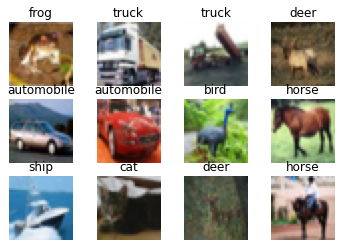

In [3]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# summarize the dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
# plot first few images
for i in range(12):
    # define subplot
    plt.subplot(3,4,i+1)
    # plot raw pixel data
    plt.title(CIFAR10_CLASSES[train_labels[i][0]])
    plt.imshow(train_images[i])
    plt.axis('off')
# show the figure
plt.show()

In [4]:
# Check the train labels
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

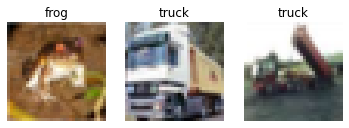

In [5]:
for i in range(3):
    plt.subplot(1,3, i+1)
    # show the figure
    plt.imshow(train_images[i]) # Show random image
    plt.title(CIFAR10_CLASSES[train_labels[i][0]]) # Set title of the sub-plot
    plt.axis('off')
plt.show()

In [6]:
train_labels[0][0]

6

**The count of Unique labesl in the train dataset**

In [7]:
unique, counts = np.unique(train_labels, return_counts=True)

In [8]:
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

In [9]:
mapping = dict(zip(CIFAR10_CLASSES, range(len(train_labels))))

In [10]:
mapping

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [11]:
train_images.max()

255

In [12]:
train_images.shape

(50000, 32, 32, 3)

In [13]:
train_images.shape[1:]

(32, 32, 3)

In [14]:
valid_images, valid_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [15]:
train_images.shape, valid_images.shape

((45000, 32, 32, 3), (5000, 32, 32, 3))

In [16]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))

2022-11-13 18:40:39.438147: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(32, 32, 3)


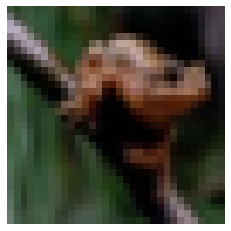

(32, 32, 3)


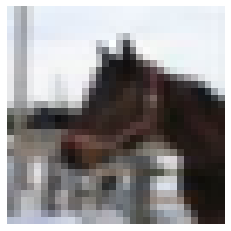

In [17]:
for image, label in train_ds.take(2):
    print(image.shape)
    plt.imshow(image), plt.axis('off')
    plt.show()

(32, 32, 3)


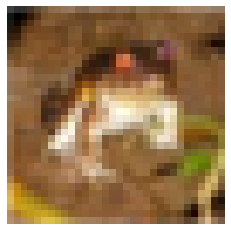

In [18]:
for image, label in valid_ds.take(1):
    print(image.shape)
    plt.imshow(image), plt.axis('off')
    plt.show()

**Compute the images in the train, test & valid dataset**

In [19]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
valid_ds_size = tf.data.experimental.cardinality(valid_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", valid_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


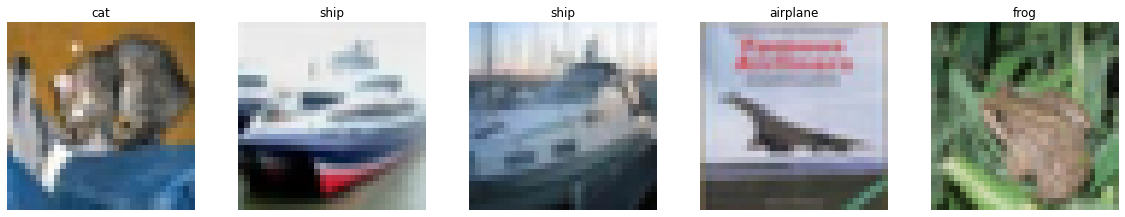

In [20]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(test_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CIFAR10_CLASSES[label.numpy()[0]])
    plt.axis('off')

In [21]:
train_ds = (train_ds.batch(batch_size=32, drop_remainder=True))
valid_ds = (valid_ds.batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.batch(batch_size=32, drop_remainder=True))

In [22]:
for image, label in train_ds.take(1):
    print(image.shape)

(32, 32, 32, 3)


In [23]:
test = test_ds.unbatch()
images = list(test.map(lambda x, y: x))
labels=list(test.map(lambda x, y: y))

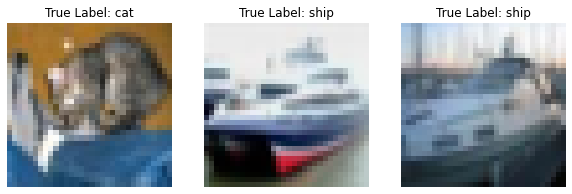

In [24]:
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(f"True Label: {CIFAR10_CLASSES[labels[i][0]]}")
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

#### Create LeNet-5 Model

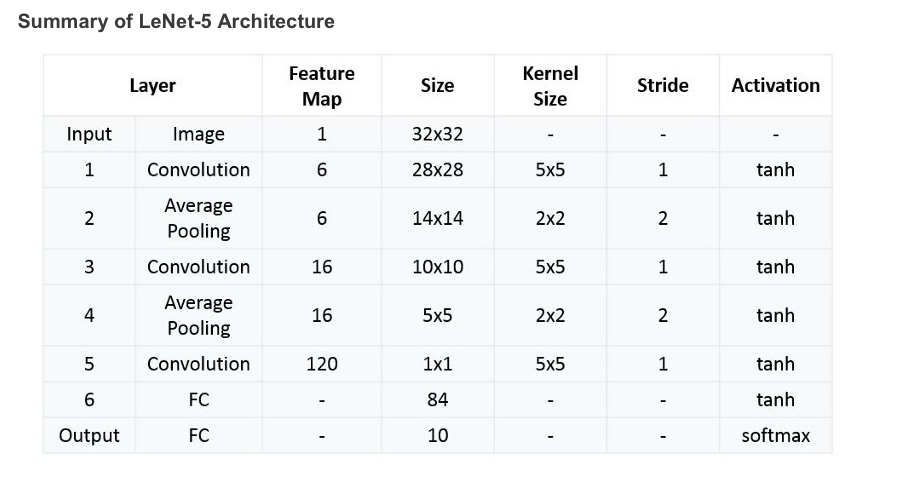

In [25]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D


model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh',
input_shape = (32,32,3), padding = 'same'))
 
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
 
# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
padding = 'valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
 
# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
padding = 'valid'))
 
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
 
# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))
 
# FC7 Output layer with softmax activation
model.add(Dense(10, activation = 'softmax'))

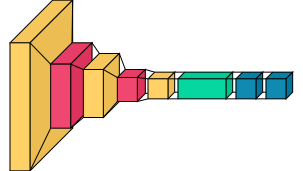

In [26]:
visualkeras.layered_view(model)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10, validation_data=valid_ds)

Epoch 1/10
1406/1406 [==============================] - 35s 25ms/step - loss: 1.6759 - accuracy: 0.3959 - val_loss: 1.4776 - val_accuracy: 0.4663
Epoch 2/10
1406/1406 [==============================] - 35s 25ms/step - loss: 1.4625 - accuracy: 0.4754 - val_loss: 1.3811 - val_accuracy: 0.5046
Epoch 3/10
1406/1406 [==============================] - 38s 27ms/step - loss: 1.3785 - accuracy: 0.5084 - val_loss: 1.3628 - val_accuracy: 0.5156
Epoch 4/10
1406/1406 [==============================] - 36s 25ms/step - loss: 1.3159 - accuracy: 0.5335 - val_loss: 1.3081 - val_accuracy: 0.5306
Epoch 5/10
1406/1406 [==============================] - 36s 26ms/step - loss: 1.2636 - accuracy: 0.5525 - val_loss: 1.3249 - val_accuracy: 0.5343
Epoch 6/10
1406/1406 [==============================] - 36s 26ms/step - loss: 1.2209 - accuracy: 0.5685 - val_loss: 1.2949 - val_accuracy: 0.5419
Epoch 7/10
1406/1406 [==============================] - 36s 25ms/step - loss: 1.1714 - accuracy: 0.5856 - val_loss: 1.2783 -

In [ ]:
model.save('LeNET.h5')

In [ ]:
pred=model.predict(test_ds)

In [ ]:
predict = np.argmax(pred, axis = 1)

In [ ]:
#Plot the learning curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(labels, predict)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.title(f"True Label: {CIFAR10_CLASSES[labels[i][0]]} \n Predicted Label: {CIFAR10_CLASSES[predict[i]]}")
    plt.imshow(images[i])
    plt.axis('off')
plt.show()